# Problem Statement
* On a typical day in the United States, police officers make more than 50,000 traffic stops. Our team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. Our goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public.

## Data Analysis of Traffic Stops for the state of Rhode Island

### Importing the required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the datasets

In [2]:
df=pd.read_csv('police.csv')

* Check the first 5 column of the datasets

In [3]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
rows,columns=df.shape

In [5]:
rows

91741

In [6]:
columns

15

# Check for the missing value in the datasets

In [7]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [8]:
df['state'].value_counts()

RI    91741
Name: state, dtype: int64

* As i can see that not a single value is present for the country column, and for the state value is same throughout the datasets and I know that we are doing data analysis for Rhode Island.
* So, simply I can drop these columns from the datasets, because it has no importance for feature engineering

In [9]:
df.drop(['county_name','state'],axis=1,inplace=True)

In [10]:
df

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


* For doing the data analysis, I want the driver_gender,stop_date and stop_time
* I can see that in driver_gender the column has null value
* So, I can drop these column as I have the sufficient datasets

In [11]:
df.dropna(subset=['stop_date', 'stop_time','driver_gender'], inplace=True)

### Checking this missing value again

In [12]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

## Shape of the datasets

In [13]:
df.shape

(86536, 13)

## Check the datatype of all the columns

In [14]:
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

## for the column is_arrested it has a datatype of object type so,  We need to convert this into boolean datatype

In [15]:
df['is_arrested']=df['is_arrested'].astype('bool')

### Now we want to create Datetime Index using stop date and stop time columns we will first combines these columns and then convert it into datetime and then will set index

In [16]:
combined = df.stop_date.str.cat(df.stop_time,sep=' ')
df['stop_datetime'] = pd.to_datetime(combined)
df.set_index('stop_datetime', inplace=True)
print(df.index)
print(df.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Let's check the data once again

In [17]:
df.head(5)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


* Now the data is ready with the stop_datetime index and the cleaned datasets

 ## Let's analyze violation column

<AxesSubplot:>

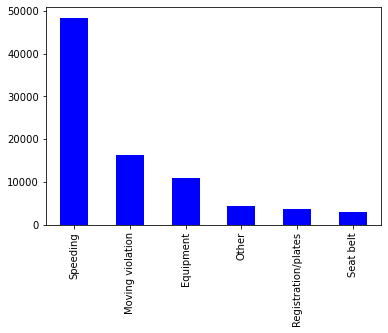

In [18]:
df.violation.value_counts().sort_values(ascending=False).plot(kind='bar',color='b')

* I can see that speed is one of the parameter which causes more violation

## Let's check the relative frequency of violation

In [19]:
df.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

* So, I can see that speeding has nearly 56% responsible which causes violation of the traffic

# Let's  Analyze by Gender

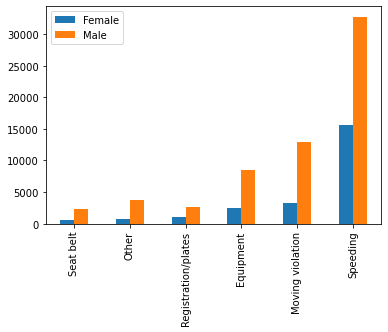

In [20]:
male = df[df['driver_gender']=='M']
M1=male.violation.value_counts().sort_values()
female = df[df['driver_gender']=='F']
F1=female.violation.value_counts().sort_values()
df1=pd.concat([F1,M1],axis='columns')

fig, ax = plt.subplots()
df1.plot(kind='bar',ax=ax)
ax.legend(["Female", "Male"]);

##  Let's have a look in police action after violating by speeding

<AxesSubplot:>

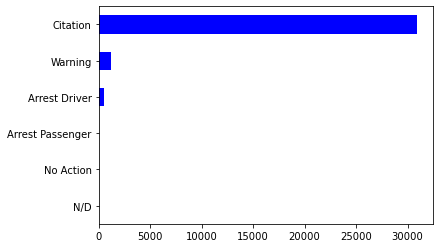

In [21]:
male_and_speeding = df[(df.driver_gender == 'M') &
(df.violation == 'Speeding')]

male_and_speeding.stop_outcome.value_counts().sort_values().plot(kind='barh',color='b')

### Let's check if the driver has violated the law then he/she has arrested or not

<AxesSubplot:ylabel='is_arrested'>

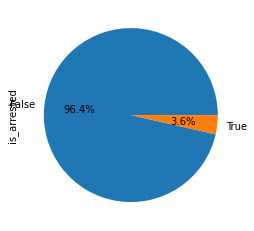

In [22]:
df.is_arrested.value_counts(normalize=True).plot(kind='pie',autopct='%0.01f%%')

* I can see that only 3.6% of the driver has been arrested

## Let's check the arrested by district wise in the state

<AxesSubplot:ylabel='district,is_arrested'>

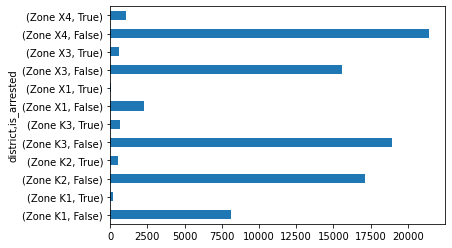

In [23]:
df.groupby('district')['is_arrested'].value_counts().plot(kind='barh')

## Let's check if the police is stopping the vehicle then he is checking or not

In [24]:
df['search_conducted'].value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

* So, I can see that onlly 3.8% of the time, Police is cheking the vehicle

## Let's have a look on search_conducted by Gender-wise

In [25]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.980819
               True                0.019181
M              False               0.954574
               True                0.045426
Name: search_conducted, dtype: float64

* I can see that male has checked more than the female

## let's have a look on the arrest rate by time of the day

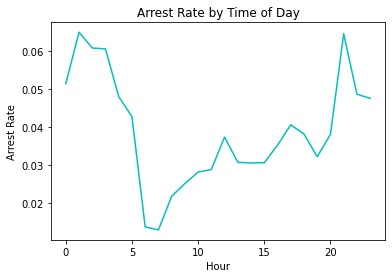

In [26]:
hourly_arrest_rate=df.groupby(df.index.hour).is_arrested.mean()


plt.plot(hourly_arrest_rate,'c')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

* Now, I can see that in night time, arrest rate is higher

## Now,let's check the drug related stop

Text(0, 0.5, 'Drug related Stops')

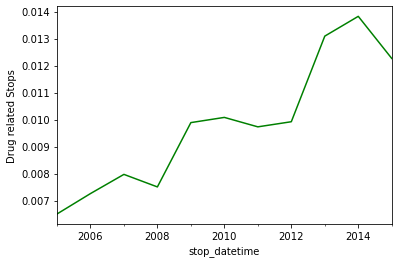

In [27]:
annual_drug_rate = df.drugs_related_stop.resample('A').mean()
annual_drug_rate.plot(c='g')
plt.ylabel('Drug related Stops')

array([<AxesSubplot:xlabel='stop_datetime'>,
       <AxesSubplot:xlabel='stop_datetime'>], dtype=object)

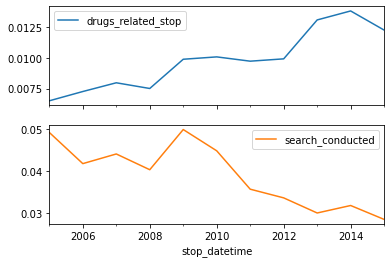

In [28]:
annual_search_rate = df.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot(subplots=True)

* By the above plot, it is clear that after decreasing in search rate,drug_related_stop has increased

## Let's check all the parameter by district-wise

In [29]:
print(pd.crosstab(df.district, df.violation))

all_zones = pd.crosstab(df.district, df.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

## Let's draw a stacked bar chart to make more insights clearly

<AxesSubplot:xlabel='district'>

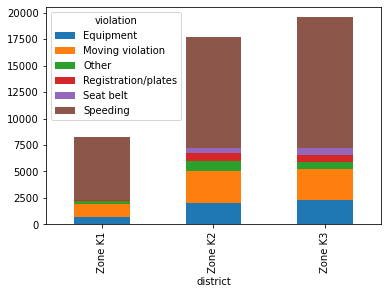

In [30]:
k_zones.plot(kind='bar',stacked=True)

* So, I can see that for all the zones, speeding is one of the parameter which casues more violation

## Let's check the stopped time of the driver

In [31]:
df.stop_duration.value_counts()

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64

* I can see that the time is not available in a fixed time limit let's assign some value to it and then examine the result

In [32]:
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)
print(df['stop_minutes'].unique())

[ 8 23 45]


## Let's analyze vilation by newly created fields

<AxesSubplot:ylabel='violation_raw'>

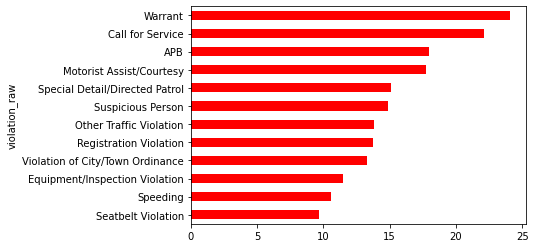

In [33]:
stop_length = df.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh',color='r')

### Effect of Weather on Action of Traffic Police in the state (Data Taken from National Center of Environmental Information )

In [34]:
weather=pd.read_csv('weather.csv')

In [35]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [36]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


## Let us examine windspeed columns(in mph)


In [37]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


## the data seems to having outliers,let's create the boxplot

<AxesSubplot:>

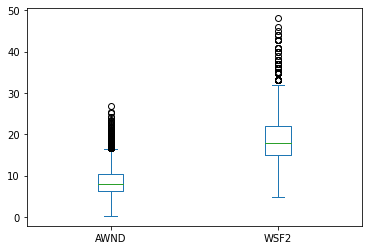

In [38]:
weather[['AWND','WSF2']].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

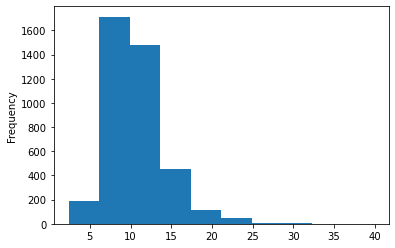

In [39]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')

In [40]:
weather[['TMIN','TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

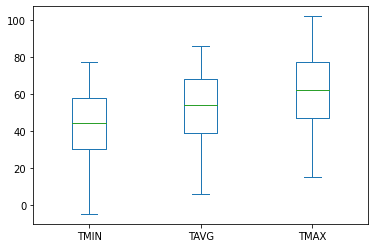

In [41]:
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

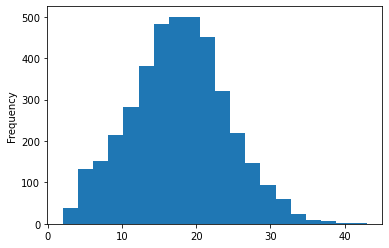

In [42]:
weather['TDIFF']=weather['TMAX']-weather['TMIN']
weather['TDIFF'].plot(kind='hist',bins=20)

## Remaining Columns denote bad weather cnditions which denote unique bad weather condition 1 denotes it is present while Nan denotes not

<AxesSubplot:ylabel='Frequency'>

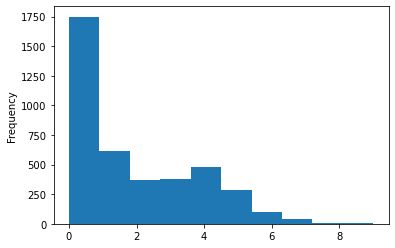

In [43]:
WT = weather.loc[:, 'WT01':'WT22']

weather['bad_conditions'] = WT.sum(axis='columns')

weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

weather.bad_conditions.plot(kind='hist')

* This shows that weather was not bad for many days

## Dictionary to map values to weather condition 0 means good 1-4 bad and 5-9 worse

In [44]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
weather['rating'] = weather.bad_conditions.map(mapping)
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [45]:
from pandas.api.types import CategoricalDtype
cats=['good','bad','worse']
cat_type = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather['rating'].astype(cat_type)
weather['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

## Merging the df data set with Weather Rating dataset which consists of date and rating only

In [46]:
df.reset_index(inplace=True)
weather_rating=weather[['DATE','rating']]
df_weather = pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
print(df_weather.shape)

(86536, 17)


### Now an important Question which arises that weather affect arrests or not

In [47]:
print(df_weather.is_arrested.mean())
print(df_weather.groupby(['rating'])['is_arrested'].mean())
print(df_weather.groupby(['violation','rating'])['is_arrested'].mean())

0.0355690117407784
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [48]:
arrest_rate=df_weather.groupby(['violation','rating'])['is_arrested'].mean()
arrest_rate.unstack()
df_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


<AxesSubplot:xlabel='violation'>

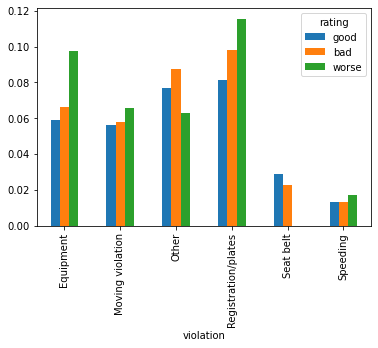

In [49]:
df_weather.pivot_table(index='violation', columns='rating', values='is_arrested').plot(kind='bar')

## Insight 
*  We can see that for each violation arrest rate increases for worse weather rating although it is doesnot specify a casual relationship but there exists a correlation within it